# Chapter 1. Spherical Functions
See also M-Sec. 4.1. and S-Sec. 2

In [1]:
from time import time
import numpy as np
import matplotlib.pyplot as plt
import polarsh as psh
from IPython.display import display

## 1.1. `SphereGrid` class
We denote the sphere, the set of all directions, as $\hat{\mathbb{S}}^2\coloneqq\left\{ \vec x \in \vec{\mathbb{R}}^3 \mid \left|\vec x\right|=1 \right\}$. While the sphere is a continuous domain, implementing spherical functions requires discretization. Our `SphereGrid` class indicate a point set on the sphere.

### 1.1.2. Contruction of `SphereGrid`
It can be constructed as its subclasses as follows.

In visualization, the global axes $\hat x_g$, $\hat y_g$, and $\hat z_g$ are visualized as red, green, and blue axes respectively.

RFBOutputContext()

[Keyboard interface]
A: hide/show global axes


CanvasBackend(css_height='440px', css_width='660px')
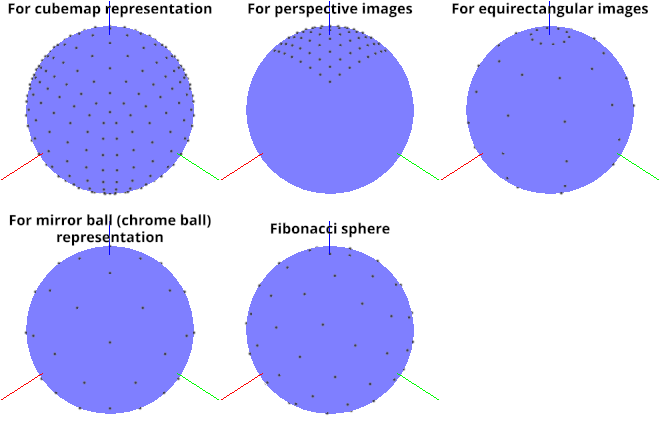

In [2]:
psh.set_visoptions_vispy(title_size = 10)
with psh.visualize_layout(2, 3, figsize=(660, 440)) as canvas:
    sphG_cube = psh.SphereGridCube(8)
    sphG_cube.visualize(title="For cubemap representation") # pixels in each edge in a cube

    sphG_persp = psh.SphereGridPersp(8, 8, 60.0, np.eye(3))
    sphG_persp.visualize(title="For perspective images", help=False) # pixel-height, pixel-width, FOV in degrees, camera transform
    
    sphG_er = psh.SphereGridEquirect(8, 10)
    sphG_er.visualize(title="For equirectangular images", help=False) # pixels in zenith, pixels in azimuth
    
    sphG_mr = psh.SphereGridMirrorball(10)
    sphG_mr.visualize(title="For mirror ball (chrome ball)\nrepresentation", help=False)
    
    sphG_fib = psh.SphereGridFibonacci(100)
    sphG_fib.visualize(title="Fibonacci sphere", help=False)

> [API Tip]
> 
> There many types classes for spherical functions in `polarsh` which has an instance of `SphereGrid` as an attribute, such as `ScalarField`, `StokesField`, and `MuellerField`. Most of operations between instances (saying `a` and `b`) of one of such classes were designed to work only if `a.SphGrid is b.SphGrid`. The reason is that comparing and resampling between two `SphereGrid` objects may be costly and nontrivial. It will be done another resampling methods.
> To make such operations available, instances of four classes `SphereGridEquirect`, `SphereGridMirrorball`, `SphereGridCube`, and `SphereGridFibonacci` are cached and their constructors do not return new objects for the same arguments.
> Similarly, results of the following methods for a `SphereGrid` instance` are also cached.
> * `SphereGrid.ThetaPhiFrameField()`
> * `SphereGrid.GeodesicFrameField()`
> * `SphereGrid.RusinkiewiczFrameField()`
> * `SphereGrid.CubemapFrameField()`
> * `SphereGrid.TD17FrameField()`
> * `SphereGrid.apply_rotation(rotation)`

In [3]:
assert sphG_er is psh.SphereGridEquirect(8, 10) # also for SphereGridCube, SphereGridMirrorball, and SphereGridFibonacci

sphG_rot = sphG_er.apply_rotation([np.pi/2, 0, 0])
assert sphG_rot is sphG_er.apply_rotation([np.pi/2, 0, 0])

sphFF = sphG_er.ThetaPhiFrameField() # will be explained in [./4_Stokes_vector_fields.ipynb]
assert sphFF is sphG_er.ThetaPhiFrameField()

### 1.1.3. Attributes of `SphereGrid`
An instance, denoted by `sphG`, in `SphereGrid` class can indicate discretization of several types of spherical domains. `ScalarField` class, which will be introduced later, indicates functions from domains characterized by its attribute `.SphGrid: SphereGrid`. Denote an instance in `ScalarField` by $f$. Depending on its `.SphGrid.dom_type: DomType`, $f$ indicates a function of one of following doamins, where $\mathbb{K} = \mathbb{R}$ or $\mathbb{C}$. For each case, the object `sphG` can be characterized by several core attributes whose types are `np.ndarray`.
1. `DomType.UNI`:
    * $f:\hat{\mathbb{S}}^2 \to \mathbb{K}$, a spherical function (scalar field on the sphere, $f\in\mathcal{F}\left(\hat{\mathbb{S}}^2, \mathbb{K}\right)$).
    * Characterized by `sphG.theta_grid` and `sphG.phi_grid`, spherical coordinates.
2. `DomType.BI`:
    * $f:\hat{\mathbb{S}}^2 \times \hat{\mathbb{S}}^2 \to \mathbb{K}$, a function of the set of pairs of spherical points (an *operator kernel* for scalar fields (S-Def. 2.3)), e.g. a BRDF.
    * Characterized by `sphG.thetai_grid`, `sphG.phii_grid`, `sphG.thetao_grid`, `sphG.phio_grid` (Not implemented yet)
3. `DomType.ISOBI`:
    * $f:\hat{\mathbb{S}}^2 \times \hat{\mathbb{S}}^2 \to \mathbb{K}$ with the azimuthal symmetry $f\left(\hat\omega_i, \hat\omega_o\right) = f\left(\vec R_{{\hat z}_g}\hat\omega_i, \vec R_{{\hat z}_g}\hat\omega_o\right) $ (S-Def 2.8). e.g., an isotropic BRDF.
    * Characterized by `sphG.phid_grid`, `sphG.thetad_grid`, `sphG.thetah_grid`, Rusinkiewicz coordinates.

Instances of `SphereGrid` also contain its Cartesian coordinates, e.g. `sphG.vec` for `sphG.dom_type == DomType.UNI`.

In [4]:
for sphG in [sphG_cube, sphG_er]:
    print(f"# ---------- {type(sphG) = } ----------")
    print(sphG)

    print("\nNote that the constructor can also be called by `SphereGrid(dom_type, ang_type, theta_grid, phi_grid)`,")
    print("where each argument will be stored as an attibute as follows:")
    print(f"{type(sphG.dom_type) = }, {sphG.dom_type = }")
    print(f"{type(sphG.ang_type) = }, {sphG.ang_type = }")
    print(f"{type(sphG.theta_grid) = }, {sphG.theta_grid.shape = }")
    print(f"{type(sphG.phi_grid) = }, {sphG.phi_grid.shape = }")
    
    print("\n`SphereGrid` instances also contain their Cartesian coordiantes:")
    print(f"{sphG.vec.shape = }", "\n")
    assert np.allclose(psh.sph2vec(sphG.theta_grid, sphG.phi_grid, ang_type=sphG.ang_type), sphG.vec)

    print("\n Shapes of `np.ndarray` objects for each coordinate can be simply obtained by the following attribute:")
    print(f"{sphG.shape = }")
    assert sphG.shape == sphG.theta_grid.shape
    assert sphG.shape == sphG.phi_grid.shape
    assert sphG.shape + (3,) == sphG.vec.shape
    
    if sphG is sphG_cube:
        print()

# ---------- type(sphG) = <class 'polarsh.grid.Grid.SphereGridCube'> ----------
SphereGrid[
  dom_type = <DomType.UNI: 0>,
  shape = [6, 8, 8],
]

Note that the constructor can also be called by `SphereGrid(dom_type, ang_type, theta_grid, phi_grid)`,
where each argument will be stored as an attibute as follows:
type(sphG.dom_type) = <enum 'DomType'>, sphG.dom_type = <DomType.UNI: 0>
type(sphG.ang_type) = <enum 'AngType'>, sphG.ang_type = <AngType.RAD: 0>
type(sphG.theta_grid) = <class 'numpy.ndarray'>, sphG.theta_grid.shape = (6, 8, 8)
type(sphG.phi_grid) = <class 'numpy.ndarray'>, sphG.phi_grid.shape = (6, 8, 8)

`SphereGrid` instances also contain their Cartesian coordiantes:
sphG.vec.shape = (6, 8, 8, 3) 


 Shapes of `np.ndarray` objects for each coordinate can be simply obtained by the following attribute:
sphG.shape = (6, 8, 8)

# ---------- type(sphG) = <class 'polarsh.grid.Grid.SphereGridEquirect'> ----------
SphereGrid[
  dom_type = <DomType.UNI: 0>,
  shape = [8, 10],
]

Note

While the above code block only uses the `psh.sph2vec` function for coordinate conversion, `polarsh` also contains other coordinates conversion functions:
* `sph2vec`: spherical coordinates to Cartesian coordinates
* `vec2sph`: Cartesian coordinates to spherical coordinates
* `sph2rus`: spherical coordinates to Rusinkiewicz coordinates
* `rus2sph`: Rusinkiewicz coordinates to spherical coordinates
* `vec2rus`: Cartesian coordinates to Rusinkiewicz coordinates (TBA)
* `rus2vec`: Rusinkiewicz coordinates to Cartesian coordinates

-----
## 1.2. `ScalarField` class
The `ScalarField` class indicates *(scalar-valued) spherical functions* (or *scalar fields on spherical domains*). It mainly characterized by two attributes:
* `.SphGrid[*g]: SphereGrid`, spherical domain on which the instance is defined
* `.fval[*g, *c]: np.ndarray`, values of the function
Here, symbols `*g` and `*c` will be explained later.

Denoting its instance `scalF: ScalarField` by $f:\hat{\mathbb{S}}^2\to \mathbb{K}$ (under the case of `.dom_type == DomType.UNI`), mathematical formulations and implementation can be converted as follows:
$$
f\left(\hat\omega\right) = f\left(\mathtt{scalF.SphGrid.vec[idx, :]}\right) = \mathtt{scalF.fval[idx, ...]}, \\
\text{where } \mathtt{idx} \text{ is a tuple of indexes within } \mathtt{scalF.SphGrid.shape}, \\
\mathbb{K} = \mathbb{R} \text{ if }\mathtt{np.isrealobj(scalF.fval)} \text{, and } \mathbb{K} = \mathbb{C} \text{ if }\mathtt{np.iscomplexobj(scalF.fval)}.
$$

### 1.2.1. Construction of `ScalarField` from an image
A simply way to construct an instance of `ScalarField` is loeading an image file.

Note that the directory `psh.data_dir` contains several data files for tutorial. First check an image file.

img.shape = (192, 256, 3)


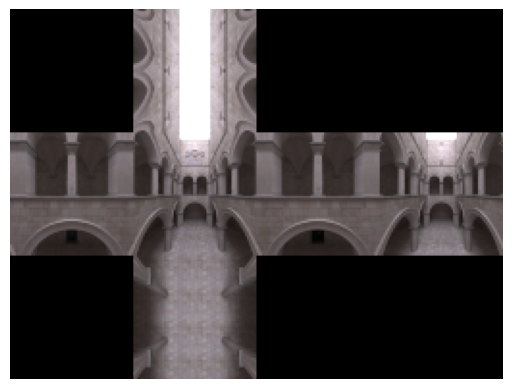

In [5]:
img_file = psh.data_dir/"sponza_64_s0.exr"
img = psh.imread(img_file)
print(f"{img.shape = }")
plt.imshow(np.clip(img, 0, 1)**(1/2.2)); plt.axis('off');

The `ScalarField` object indicating the environment map above can be constructed by the class method `ScalarField.from_cubeimage()`.

In [6]:
scalF = psh.ScalarField.from_cubeimage(img_file)
print(f"{type(scalF) = }")
print(scalF)

print("\n# Attibute `.SphGrid`")
sphG = scalF.SphGrid
print(sphG)
assert isinstance(sphG, psh.SphereGrid) # For general `psh.SphereGrid` instances
assert isinstance(sphG, psh.SphereGridCube) # Only for instances contructed by `psh.ScalarField.from_cube_image()`

print("\n# Attribute `.fval")
print(f"{type(scalF.fval) = }")
print(f"{scalF.fval.shape = }")

type(scalF) = <class 'polarsh.grid.Grid.ScalarField'>
ScalarField[
  dom_type = <DomType.UNI: 0>,
  fval.shape = [g:6, 64, 64 | c:3,],
]

# Attibute `.SphGrid`
SphereGrid[
  dom_type = <DomType.UNI: 0>,
  shape = [6, 64, 64],
]

# Attribute `.fval
type(scalF.fval) = <class 'numpy.ndarray'>
scalF.fval.shape = (6, 64, 64, 3)


### 1.2.2. The shape of the attribute `.fval`

In our documentation and comments on the code, we usually denote `.SphGrid.shape` by `*g` and shapes of *channels* of `ScalarField` (and further types of spherical functions including `StokesField` and `MuellerField`, `StokesConvKernel` introduced in [`4_Stokes_vector_fields.ipynb`](./4_Stokes_vector_fields.ipynb)) by `*c`. Here, the *channel shape* `*c` often indicate RGB channels (for `c == (3,)`) but may indicate any shape of for `np.ndarray` which will be handled by an elementwise manner for methods of `ScalarField`.

For the case of the instance `scalF` above, we say that its *grid shape* is `g == (6, 64, 64)` and its *channel shape* if `c == (3,)`.

In [7]:
print(f"{scalF.shape_grid = }") # [*g]
assert scalF.shape_grid == sphG.shape

print(f"{scalF.shape_chan = }") # [*c]
print(f"{scalF.fval.shape = }") # [*g, *c]
assert scalF.fval.shape == scalF.shape_grid + scalF.shape_chan

scalF.shape_grid = (6, 64, 64)
scalF.shape_chan = (3,)
scalF.fval.shape = (6, 64, 64, 3)


Note that the image `img` has the shape `(192, 256, 3)` but the `ScalarField` instance `scalF` has `scalF.fval.shape == (6, 64, 64, 3)`. These two formulations can be simply converted each other by functions `psh.envmap_unfold` and `psh.envmap_stack`, which appends and ignores redundant black pixels, resp.

In [8]:
assert np.array_equal(psh.envmap_unfold(scalF.fval), img) # [6, edge, edge, *] -> [3*edge, 4*edge, *]
assert np.array_equal(psh.envmap_stack(img), scalF.fval) # [3*edge, 4*edge, *] -> [6, edge, edge, *]

### 1.2.3. Visualization
From visualized sphere object, one can observe an important convention used in the `polarsh` package. Since the domain of spherical functions indicate the direction of propagation of rays, the 'up' face of the cubemap image corresponds to the face including $\hat\omega = -\hat z_g$.

Visualizing `ScalarField` objects supports two modes (toggled by the 'V' key):
* texture mode: looks more a continuous function
* point cloud mode: users can see how the spherical function is discretized explicitly 
> [Warning]: Curretnly the texture mode visualization for `ScalarField` objects is only supported when the `.SphGrid` instance belongs to `SphereGridCube` and `SphereGridEquirect`. The cases for `SphereGridMirrorball` and `SphereGridFibonacci` only support the point cloud mode visualization.

RFBOutputContext()

[Keyboard interface]
V: texture/point cloud mode
A: hide/show global axes


CanvasBackend(css_height='500px')
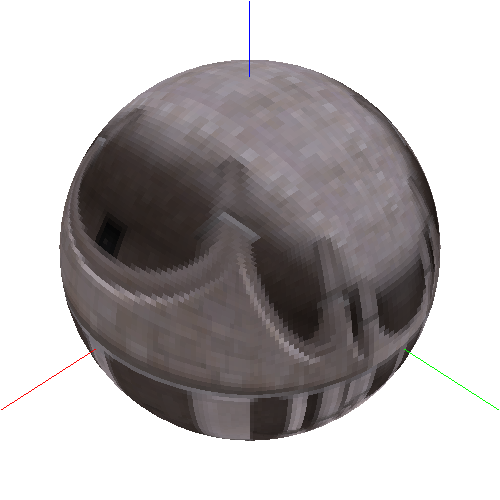

In [9]:
scalF.visualize()

## 1.3. Operations on scalar fields
`psh.ScalarField` has methods for operations on scalar fields. For scalar fields $f, g:\hat{\mathbb{S}}^2\to \mathbb K$ ($\mathbb{K}=\mathbb R$ or $\mathbb C$):
* Rotation of $f$ by $\vec R \in \overrightarrow{SO}\left(3\right)$:
$$
\begin{equation}\tag{M-8, S-44}
   {\vec R}_{\mathcal F}\left[f\right]:\hat{\mathbb{S}}^2\to \mathbb K , \quad\text{where}\quad {\vec R}_{\mathcal F}\left[f\right]\left(\hat\omega\right)\coloneqq f\left({\vec R}^{-1}\hat\omega\right).
\end{equation}
$$
* Inner product of $f$ and $g$:
$$
\begin{align}\tag{M-3, S-33}
   {\left\langle f, g\right\rangle}_{\mathcal{F}} &\coloneqq \int_{\hat{\mathbb S}^2}{f^*\left(\hat\omega\right)g\left(\hat\omega\right)\mathrm d \omega}, \\
   \text{where }\int_{\hat{\mathbb S}^2}{\mathrm d \omega} &\approx \sum_{\mathtt{i}}\mathtt{f.SphGrid.weight()[i]}. \nonumber
\end{align}
$$

Inner product <f,g>_F: [2.04205695 1.52658585 1.33911116] (for RGB)


RFBOutputContext()

[Keyboard interface]
V: texture/point cloud mode
A: hide/show global axes


CanvasBackend(css_height='600px', css_width='900px')
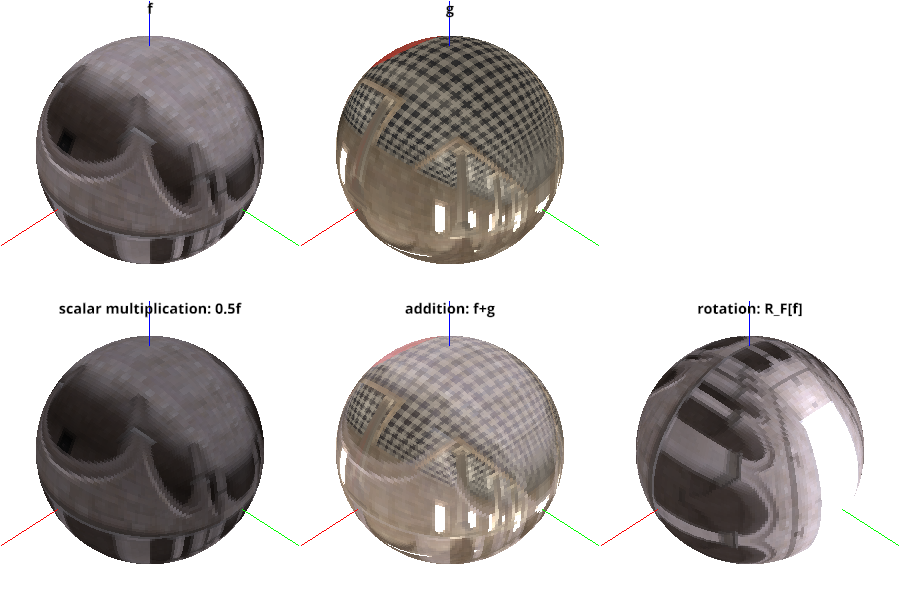

In [10]:
# ---------- Load another scalar field ----------
scalF2 = psh.ScalarField.from_cubeimage(psh.data_dir/"cathedral_64_s0.exr")
assert scalF.SphGrid is scalF2.SphGrid # `psh.ScalarField.from_cubeimage` internally called `psh.SphereGridCube()`, which constructs cached objects

# ---------- Apply operations ----------
# (1) Pointwise operations for `SphereGrid.fval`
scalF_scalmul = scalF*0.5
scalF_add = scalF + scalF2

# (2) Rotation
R = [np.pi/2, 0, 0] # around x-axis by pi/2, its 3x3 matrix formulation with the global frame is \vec{R}
scalF_rot = scalF.apply_rotation(R)

# (3) Inner product (elemetwise manner for channels)
inner = scalF.inner(scalF2)
assert np.allclose(inner, (scalF.fval.conj() * scalF2.fval * scalF.SphGrid.weight()[..., None]).sum(scalF.axes_grid))
print(f"Inner product <f,g>_F: {inner} (for RGB)")

# ---------- Visualize ----------
with psh.visualize_layout(2, 3, figsize=(900, 600)) as canvas:
    # ---------- Row 1 ----------
    scalF.visualize(title="f")
    scalF2.visualize(title="g", help=False)
    psh.visualize_layout.skip()

    # ---------- Row 2 ----------
    scalF_scalmul.visualize(title="scalar multiplication: 0.5f", help=False)
    scalF_add.visualize(title="addition: f+g", help=False)
    scalF_rot.visualize(title="rotation: R_F[f]", help=False)

## 1.4 Spherical convolution
Similar to the planar domain, convolution operations between two functions can also be defined in the spherical domain. However, unlike in the planar domain, the two terms in the operation in the spherical domain are not the same type of functions.

For a spherical function (scalar field) $f:\hat{\mathbb{S}}^2\to \mathbb{K}$ and a *(scalar) convolution kernel* $k:\left[0,\pi\right]\to\mathbb{K}$, which is also considered as a azimuthally symmetric spherical function $k\left(\theta\right)=k\left(\theta,\phi\right)$, the (scalar) spherical convolution of $k$ and $f$ is defined as follows:
$$
\begin{equation}\tag{M-10, S-70}
k*f\left(\hat\omega\right) = \int_{\hat{\mathbb{S}}^2}{k\left(\cos^{-1}\hat\omega\cdot\hat\omega' \right) f\left(\hat\omega'\right)\mathrm d \hat\omega'}
\end{equation}
$$

In `polarsh`, `ScalarConvKernel` encodes such kernels on the convolution operation $f\mapsto k*f$ itself. To avoid aliasing/resampling problem in Eqs. (M-10, S-70) and to retain only trivial implementation into the package, `ScalarConvKernel` only allows the argument of analytic function objects $\theta\mapsto k\left(\theta\right)$.

Based on the fact that $k = k* \delta_{\hat z_g}$, where $\delta_{\hat z_g}$ denotes a Dirac delta scalar field centered at the global $\hat z_g$ direction, `kernel` can be understand as a scalar field by applying its convolution operation on a Diract delta using the `ScalarConvKernel.apply_delta()` method.

RFBOutputContext()

CanvasBackend(css_height='500px')
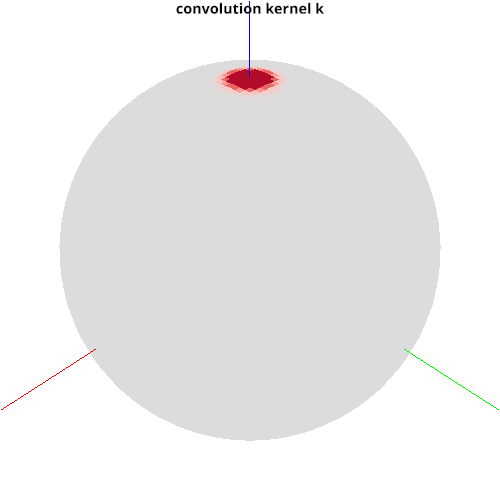

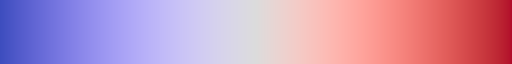

In [11]:
# `ScalarConvKernel` object
def func_kernel(theta):
    sigma = 0.05
    mu = 0.0
    return 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (theta - mu)**2 / (2 * sigma**2))
kernel = psh.ScalarConvKernel(func_kernel) # $k$ or $k*$

# As a `ScalarField` object
sphG = psh.SphereGridCube(64) # any instance of `SphereGrid` you want is okay
z_g = [0, 0, 1]
kernel_scalF = kernel.apply_delta(z_g, sphG)
display(kernel_scalF.visualize(title="convolution kernel k", help=False))
psh.pltcmap_diverge # show colorbar

Apply convolution using the method: `psh.ScalarConvKernel.apply(scalF: psh.ScalarField) -> psh.ScalarField`

In [12]:
res_list = []
for scalF_curr in [scalF, scalF2, scalF_add, scalF_rot]:
    with psh.Tictoc("# Convolution done in %.4f sec."):
        res_list.append(kernel.apply(scalF_curr))
k_conv_scalF, k_conv_scalF2, k_conv_scalF_add, k_conv_scalF_rot = res_list

# Convolution done in 20.7846 sec.
# Convolution done in 21.8710 sec.
# Convolution done in 22.1913 sec.
# Convolution done in 21.2976 sec.


Assert that convolution with a fixed kernel $f\mapsto k*f$ is a **rotation equiratiant linear operator**.

In [13]:
assert k_conv_scalF_add.allclose(k_conv_scalF + k_conv_scalF2)
assert k_conv_scalF_rot.allclose(k_conv_scalF.apply_rotation(R)) # results of `SphereGrid.apply_rotation` were cached

Visualize convolution results

RFBOutputContext()

[Keyboard interface]
V: texture/point cloud mode
A: hide/show global axes


CanvasBackend(css_height='600px', css_width='1200px')
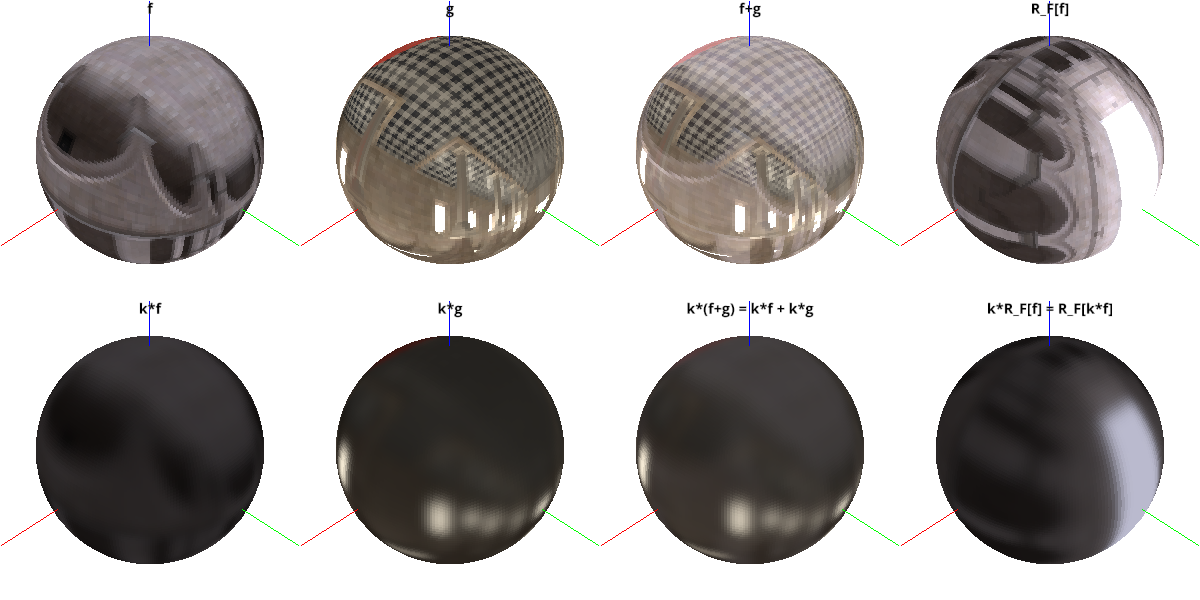

In [14]:
with psh.visualize_layout(2, 4, figsize=(1200, 600)) as canvas:
    # Row 1
    scalF.visualize(title="f")
    scalF2.visualize(title="g", help=False)
    scalF_add.visualize(title="f+g", help=False)
    scalF_rot.visualize(title="R_F[f]", help=False)

    # Row 2
    k_conv_scalF.visualize(title="k*f", help=False)
    k_conv_scalF2.visualize(title="k*g", help=False)
    k_conv_scalF_add.visualize(title="k*(f+g) = k*f + k*g", help=False) # Using `k_conv_scalF + k_conv_scalF2` instead of `k_conv_scalF_add` will produce the same visualization
    k_conv_scalF_rot.visualize(title="k*R_F[f] = R_F[k*f]", help=False) # Using `k_conv_scalF.apply_rotation(R)` instead of `k_conv_scalF_rot` will produce the same visualization

## 1.5. `ScalarField.chan` attribute
This part does not correspond to any equation in the paper. The concept of `ScalarField.chan` is just for implementation.
Recall that an object `scalF: ScalarField` has `.shape_grid` and `.shape_chan` attributes. `scalF.chan` makes it behave like an `np.ndarray` instance with the shape of `scalF.shape_chan`, and applying most of operations on `scalF.chan` returns a `ScalarField` object. Such result will be equivalent to `ScalarField(scalF.SphGrid, [some operation on](scalF.fval))`.

For instance assume `scalF.shape_grid == (6, 64, 64)`. then `scalF.chan[some,ind,ices]` returns a `ScalarField` instance with the same `.SphGrid` attribute and `.fval == scalF.fval[:, :, :, some,ind,ices]`.

In [15]:
# Recall
print(scalF)
print(f"{scalF.fval.shape = }")
sphG = scalF.SphGrid
assert sphG.shape == scalF.shape_grid
assert scalF.fval.shape == scalF.shape_grid + scalF.shape_chan

ScalarField[
  dom_type = <DomType.UNI: 0>,
  fval.shape = [g:6, 64, 64 | c:3,],
]
scalF.fval.shape = (6, 64, 64, 3)


In [16]:
scalF_Ronly = psh.ScalarField(sphG, scalF.fval[..., 0]) # Red color channel only, too long
assert scalF_Ronly.allclose(scalF.chan[0]) # `.chan[0]` is much shorter!

scalF_gray = psh.ScalarField(sphG, psh.rgb2gray(scalF.fval)) # too long
assert scalF_gray.allclose(scalF.chan.rgb2gray()) # much shorter!

Note that the overloaded arithmetic opeartion `scalF * arg` and `scalF / arg` is only defined if `isinstance(arg, ScalarField)` or `np.isscalar(arg)`. When users want to apply these operations with `arg: np.ndarray` and broadcasting channel shapes, they need to use `scalF.chan * arg`.

In [17]:
# Recall
print(f"{scalF_gray = }\n") # [6, 64, 64]
assert scalF_gray.shape_chan == () # Empty channel shape

# Prohibited usage
color = np.array([1.0, 0.0, 0.0])
assert color.shape == (3,)
try:
    scalF_g2r = scalF_gray * color
except:
    print("Error!\nIt is not clear how to multiple two `np.ndarray`s with "
          f"shapes:\n`{scalF_gray.fval.shape = }` and `{color.shape = }`\n")
    
# Use `ScalarField.chan`
res = scalF_gray.chan * color # `scalF_gray.chan` behaves as an array with shape `()`,
                              # which can be broadcasted with (3,)
print(f"{type(res) = }")
print(f"{res = }")

scalF_gray = ScalarField[
  dom_type = <DomType.UNI: 0>,
  fval.shape = [g:6, 64, 64 | c:],
]

Error!
It is not clear how to multiple two `np.ndarray`s with shapes:
`scalF_gray.fval.shape = (6, 64, 64)` and `color.shape = (3,)`

type(res) = <class 'polarsh.grid.Grid.ScalarField'>
res = ScalarField[
  dom_type = <DomType.UNI: 0>,
  fval.shape = [g:6, 64, 64 | c:3,],
]
